In [1]:
import pandas as pd 
import os 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler


In [2]:
np.random.seed(1)

In [3]:
Data_sims_file = "C:\\Users\\Mehdi-GHRABLI\\Desktop\\New_Launch\\New_launch_files\\user_files" #Data_sims_file is the folder containing the simulation results
Design_point_folders = [ f.path for f in os.scandir(Data_sims_file) if f.is_dir() ]

In [4]:
Names_list = []
Current_list = []
Rh_list = []
Rw_list = []
Alpha_list = []
Temperature_list = []


Suff_contact= [" Contact Time 1.txt"," Contact Time 2.txt"]
Suff_metal= [" Metal Time 1.txt"," Metal Time 2.txt"]

Initial_local_names = [
    "Directional Deformation X",
    "Directional Deformation Y",
    "Directional Deformation Z",
    "Elastic Strain Intensity",
    "Equivalent Elastic Strain",
    "Equivalent Plastic Strain",
    "Equivalent Stress",
    "Equivalent Total Strain",
    "Maximum Principal Elastic Strain",
    "Maximum Principal Stress",
    "Maximum Shear Elastic Strain",
    "Maximum Shear Stress",
    "Middle Principal Elastic Strain",
    "Middle Principal Stress",
    "Minimum Principal Elastic Strain",
    "Minimum Principal Stress",
    "Normal Elastic Strain X",
    "Normal Elastic Strain Y",
    "Normal Elastic Strain Z",
    "Normal Stress X",
    "Normal Stress Y",
    "Normal Stress Z",
    "Shear Elastic Strain XY",
    "Shear Elastic Strain XZ",
    "Shear Elastic Strain YZ",
    "Shear Stress XY",
    "Shear Stress XZ",
    "Shear Stress YZ",
    "Stress Intensity",
    "Thermal Strain X",
    "Thermal Strain Y",
    "Thermal Strain Z",
    "Total Deformation"
]

Suff_ab_contact = ["_C1","_C2"]
Suff_ab_metal = ["_M1","_M2"]
Initial_local_names_ab = ["DDX","DDY","DDZ","ESI","EES","EPS","ES","ETS","MaxPES","MaxPS","MaxSES","MaxSS","MidPES","MidPS","MinPES","MinPS","NESX","MESY","NESZ","NSX","NSY","NSZ","SESXY","SESXZ","SESYZ","SSXY","SSXZ","SSYZ","SI","TSX","TSY","TSZ","TD"]

Final_local_names_contact = []
Final_local_names_metal = []

Final_local_ab_contact = []
Final_local_ab_metal = []



for i in Initial_local_names:
  for sC in Suff_contact:
    Final_local_names_contact.append(i+sC)
  for sM in Suff_metal:
    Final_local_names_metal.append(i+sM)

for i in Initial_local_names_ab:
  for sC in Suff_ab_contact:
    Final_local_ab_contact.append(i+sC)
  for sM in Suff_ab_metal:
    Final_local_ab_metal.append(i+sM)




In [5]:
#Contact
local_contact_data = pd.DataFrame()
#Add origin
for  sf in tqdm(Design_point_folders):
  subfolder_name = sf.split('\\')[-1]
  Names_list.append(subfolder_name)
  #Get average temperature
  try:
    file = open(sf + "/Average_Chip_Temperature.txt", "r")
    file_content=file.readlines()[0]
    str_temp = file_content.split(" ")[0]
    temp = float(str_temp)
    Temperature_list.append(temp)
    file.close()
  except :
    pass


  try:
    file = open(sf + "/Params.txt", "rb")
    content=file.readlines()
    Current_st = content[4]
    Current_value = float(Current_st.decode("utf-8").split(" ")[-1][:-3])
    Current_list.append(Current_value)
    Rh_st = content[5]
    Rh_value = float(Rh_st.decode("utf-8").split(" ")[-1][:-3])
    Rh_list.append(Rh_value)
    Rw_st = content[6]
    Rw_value = float(Rw_st.decode("utf-8").split(" ")[-1][:-3])
    Rw_list.append(Rw_value)
    alpha_st = content[7]
    Alpha_value = float(alpha_st.decode("utf-8").split(" ")[-1][:-3])
    Alpha_list.append(Alpha_value)
    file.close()
  except :
    pass

  inst_df = pd.DataFrame()
  # for ind, inst in enumerate(Final_local_names_contact):
  for ind, inst in enumerate(Final_local_names_metal):
    f_data = pd.read_csv(sf + "/"+inst,sep = "\t")
    # inst_df[Final_local_ab_contact[ind]]=f_data[f_data.columns[-1]].str.replace(',','.').astype(float)
    inst_df[Final_local_ab_metal[ind]]=f_data[f_data.columns[-1]].str.replace(',','.').astype(float)
  file = open(sf + "/Origin.txt", "r")
  file_content=file.readlines()
  X_or = float(file_content[0].split(" ")[-1][:-2])
  Y_or = float(file_content[1].split(" ")[-1][:-2])
  Z_or = float(file_content[2].split(" ")[-1][:-2])
  file.close()

  inst_df["Names"] = subfolder_name
  inst_df["Temperature (°C)"] = temp
  inst_df["Current (mA)"] = Current_value
  inst_df["Contact major radius (mm)"] = Rh_value
  inst_df["Contact minor radius (mm)"] = Rw_value
  inst_df["Alpha"] = Alpha_value
  inst_df["X (mm)"]=(f_data[f_data.columns[1]].str.replace(',','.').astype(float)-X_or)/Rw_value
  inst_df["Y (mm)"]=(f_data[f_data.columns[2]].str.replace(',','.').astype(float)-Y_or)/Rh_value
  inst_df["Z (mm)"]=f_data[f_data.columns[3]].str.replace(',','.').astype(float)-Z_or
  local_contact_data =pd.concat([local_contact_data,inst_df])




100%|██████████| 1289/1289 [20:45<00:00,  1.03it/s]


In [6]:
local_contact_data = local_contact_data.loc[local_contact_data["Temperature (°C)"]>20]

Simulation values 

In [21]:
Eps_Exp = pd.DataFrame({"DeltaT":[70,90,110],"EpsEl":[5.62*(10**-4),5.78*(10**-4),5.93*(10**-4)],"EpsPl":[1.81*(10**-3),2.46*(10**-3),3.17*(10**-3)]}) #ton = 3s

In [22]:
Eps_Heat = (
    local_contact_data.groupby("Names", as_index=False)
      .apply(lambda g: g.loc[g["ETS_M1"].idxmax(), ["Names", "Temperature (°C)", "ETS_M1","Contact major radius (mm)"]])
      .reset_index(drop=True)
      .set_index("Names")
)
Eps_Cool = (
    local_contact_data.groupby("Names", as_index=False)
      .apply(lambda g: g.loc[g["ETS_M2"].idxmax(), ["Names", "Temperature (°C)", "ETS_M2","Contact major radius (mm)"]])
      .reset_index(drop=True)
      .set_index("Names")
)

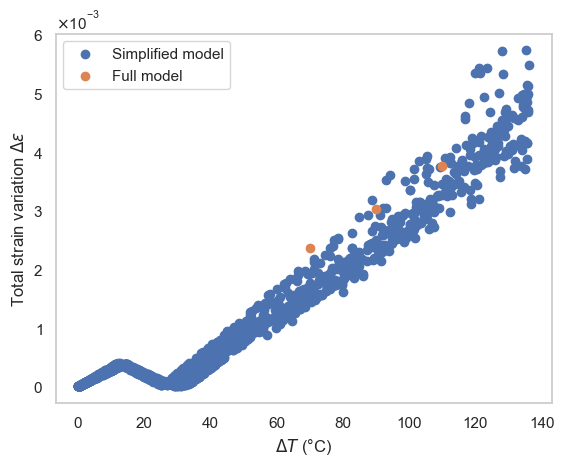

In [23]:
fig, ax = plt.subplots()
# ax.plot(x, y)

# Format y-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))   # force scientific notation if outside [1e-3, 1e3]
ax.yaxis.set_major_formatter(formatter)

# plt.show()

plt.scatter(Eps_Heat["Temperature (°C)"]-55,np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]))
plt.scatter(Eps_Exp["DeltaT"],Eps_Exp["EpsEl"]+Eps_Exp["EpsPl"])
plt.grid()
plt.xlabel("$\Delta T$ (°C)")
plt.ylabel("Total strain variation $\Delta \epsilon$")
plt.legend(["Simplified model","Full model"])

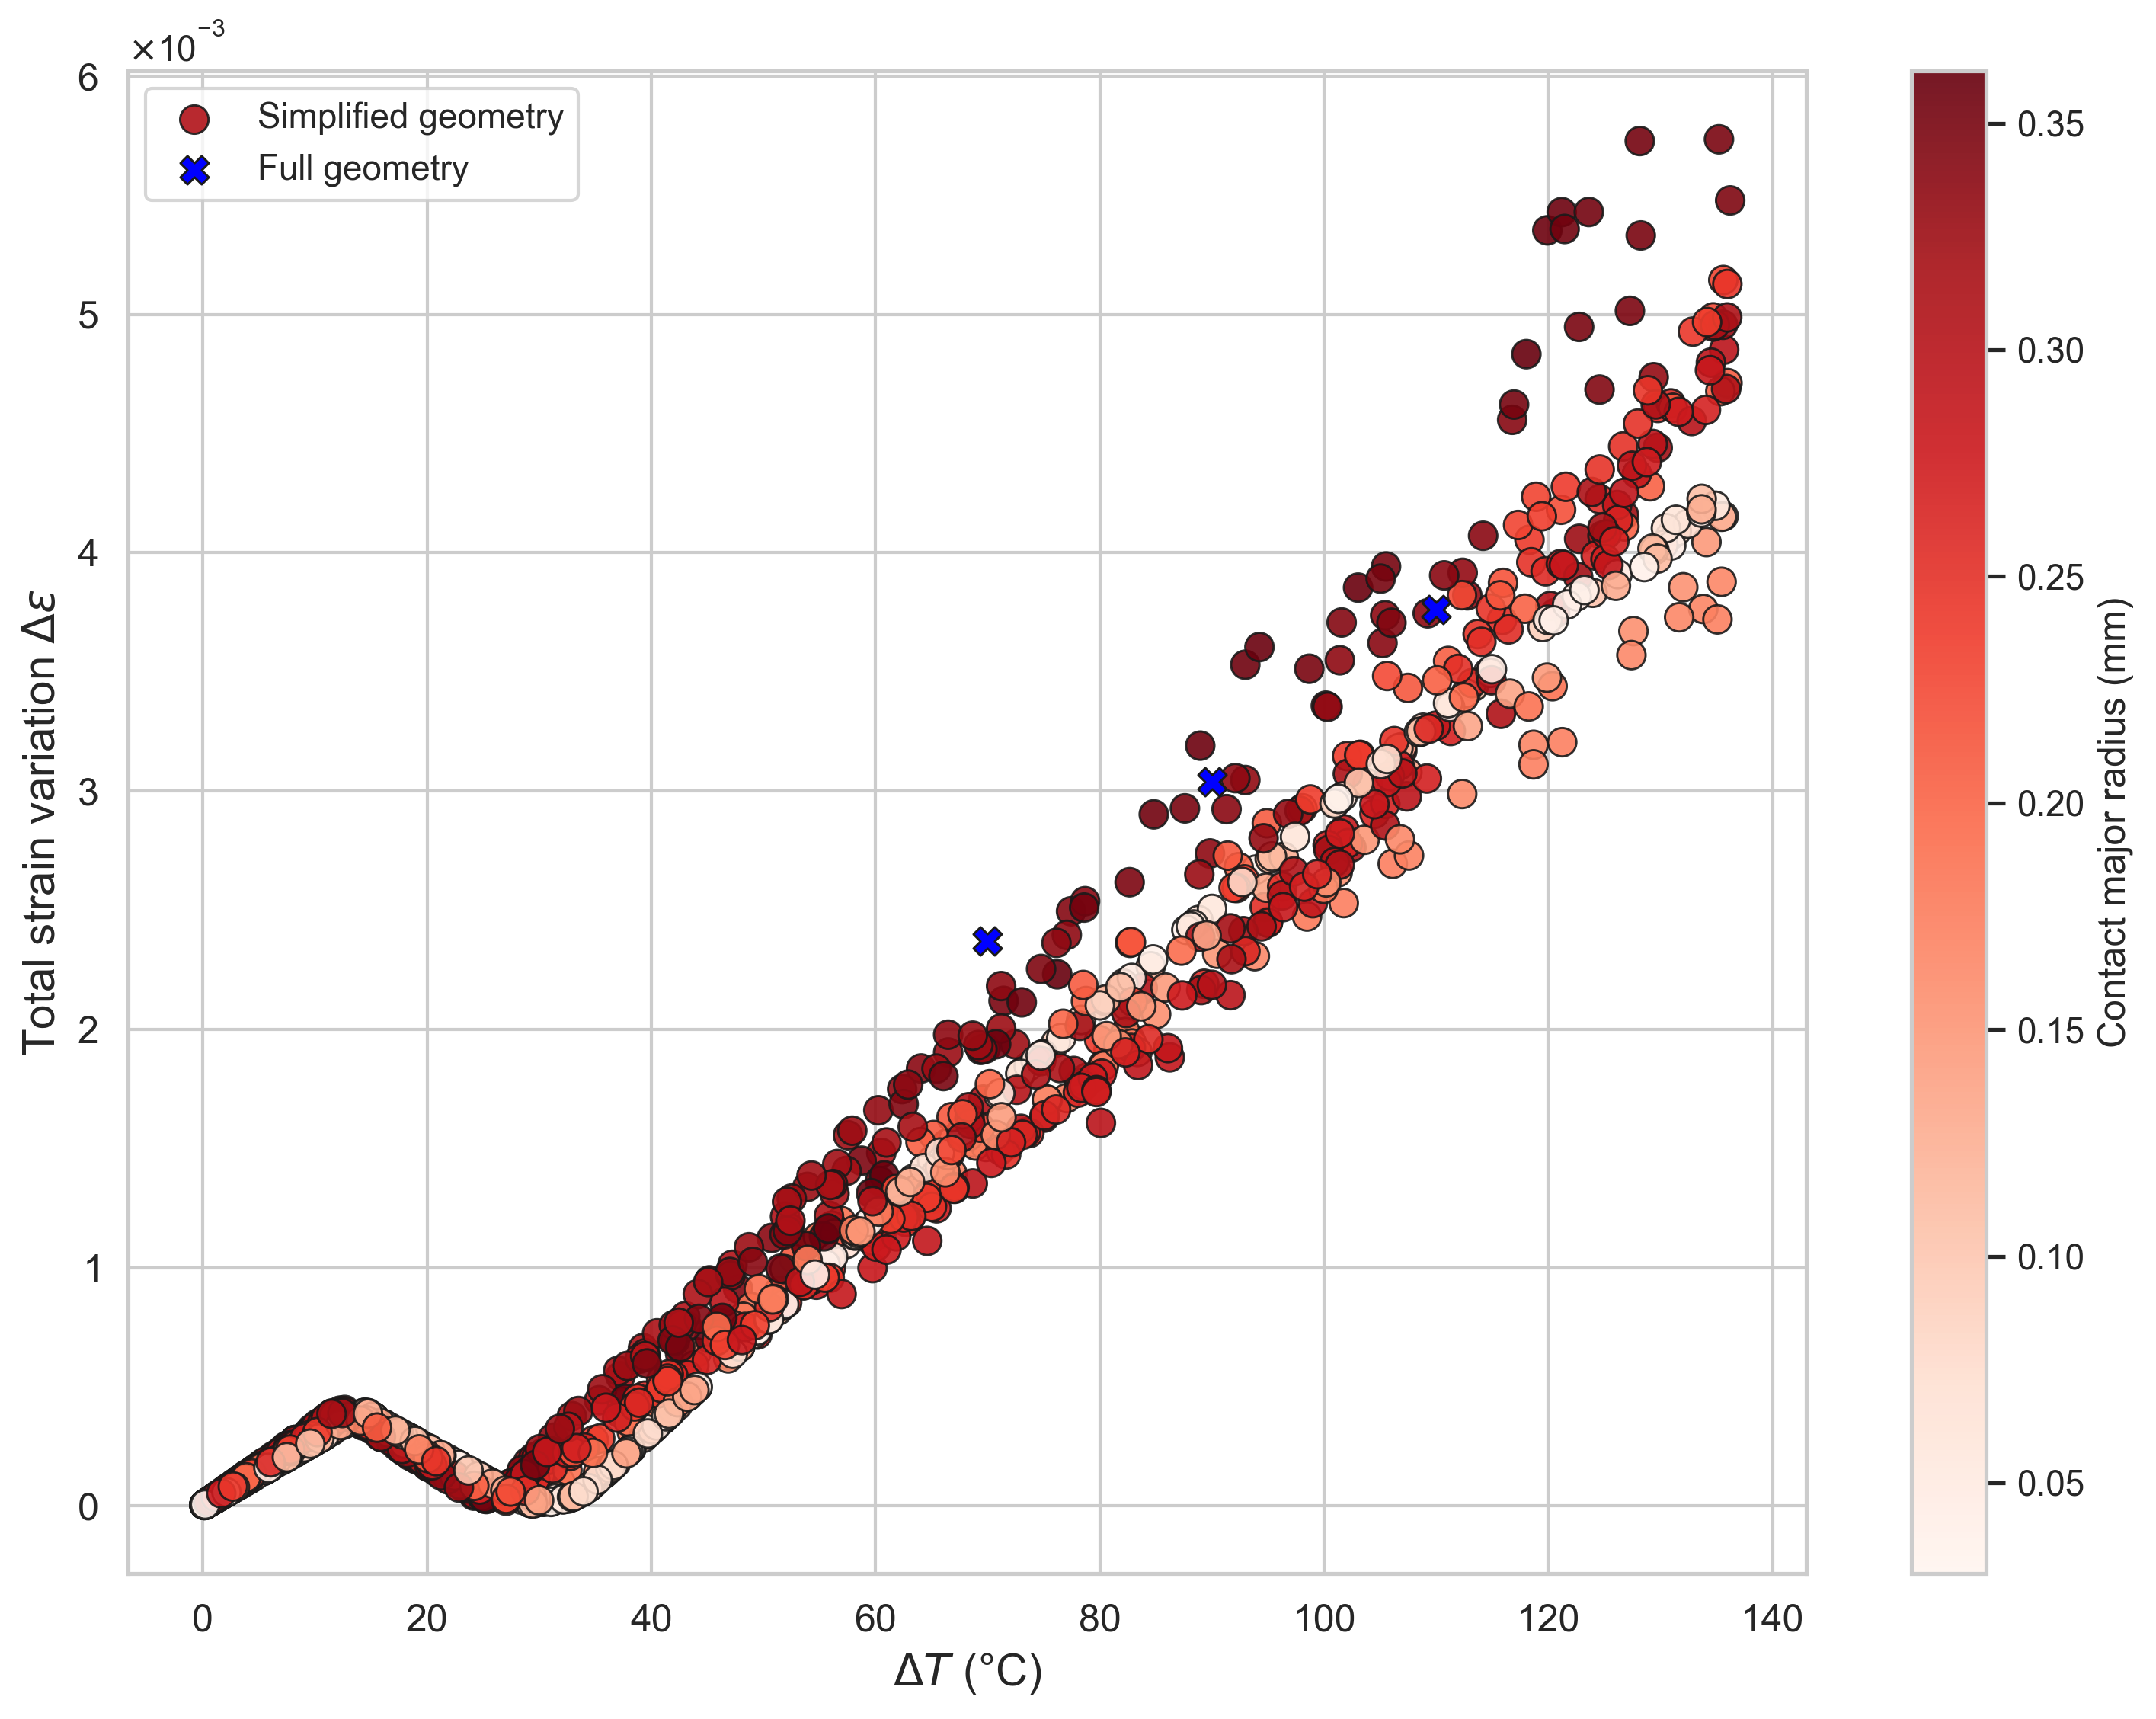

In [24]:
import seaborn as sns


# --- Main Script ---

# 1. Load your data
# In your actual use case, you would load your dataframe here, for example:
# df = pd.read_csv('your_data.csv') 
# For demonstration, we use the sample data generator.



# Define column names from your dataframe for easier access

temp_col = "Temperature (°C)"
radius_col = "Contact major radius (mm)"
strain_col = "ETS_C1"



# 3. Plot the results
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
# fig.suptitle('Mean Total Strain Distribution', fontsize=18)

# --- Data Transformation for Plotting ---
# a. X-axis: Temperature difference from the minimum temperature
# temp_min_val = aggregated_df[temp_col].min()
# x_values = aggregated_df[temp_col] - temp_min_val

# # b. Y-axis: Radius converted from mm to micrometers
# y_values = aggregated_df[radius_col] * 1000

# # c. Color: Mean strain values
# color_values = aggregated_df['mean'] #### 

# Scatter plot with transformed data
sc = ax.scatter(
    Eps_Heat["Temperature (°C)"]-55,np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]),
    c=Eps_Heat["Contact major radius (mm)"],
    cmap='Reds',
    edgecolors='k', s=80, linewidth=0.7, alpha=0.9
)

ax.scatter(Eps_Exp["DeltaT"],Eps_Exp["EpsEl"]+Eps_Exp["EpsPl"],edgecolors='k', s=80, linewidth=0.7,color="blue",marker="X")
ax.legend(["Simplified geometry","Full geometry"])

# Add and configure the color bar
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Contact major radius (mm)', fontsize=12)

# Set labels for the subplot using LaTeX for formatting
ax.set_xlabel(r'$\Delta T$ (°C)', fontsize=14)
ax.set_ylabel(r'Total strain variation $\Delta \epsilon$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Set axis limits dynamically from the transformed data
x_padding = (np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() - np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min()) * 0.05
y_padding = (np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() - np.abs(Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min()) * 0.05

# ax.set_xlim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - x_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + x_padding)
# ax.set_ylim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - y_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + y_padding)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))   # force scientific notation if outside [1e-3, 1e3]
ax.yaxis.set_major_formatter(formatter)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("mean_strain_plot.png", dpi=300, bbox_inches='tight')
plt.show()


#Give a more meaningful color code (from black to white, no nuances)
#Plot nausicaa values 

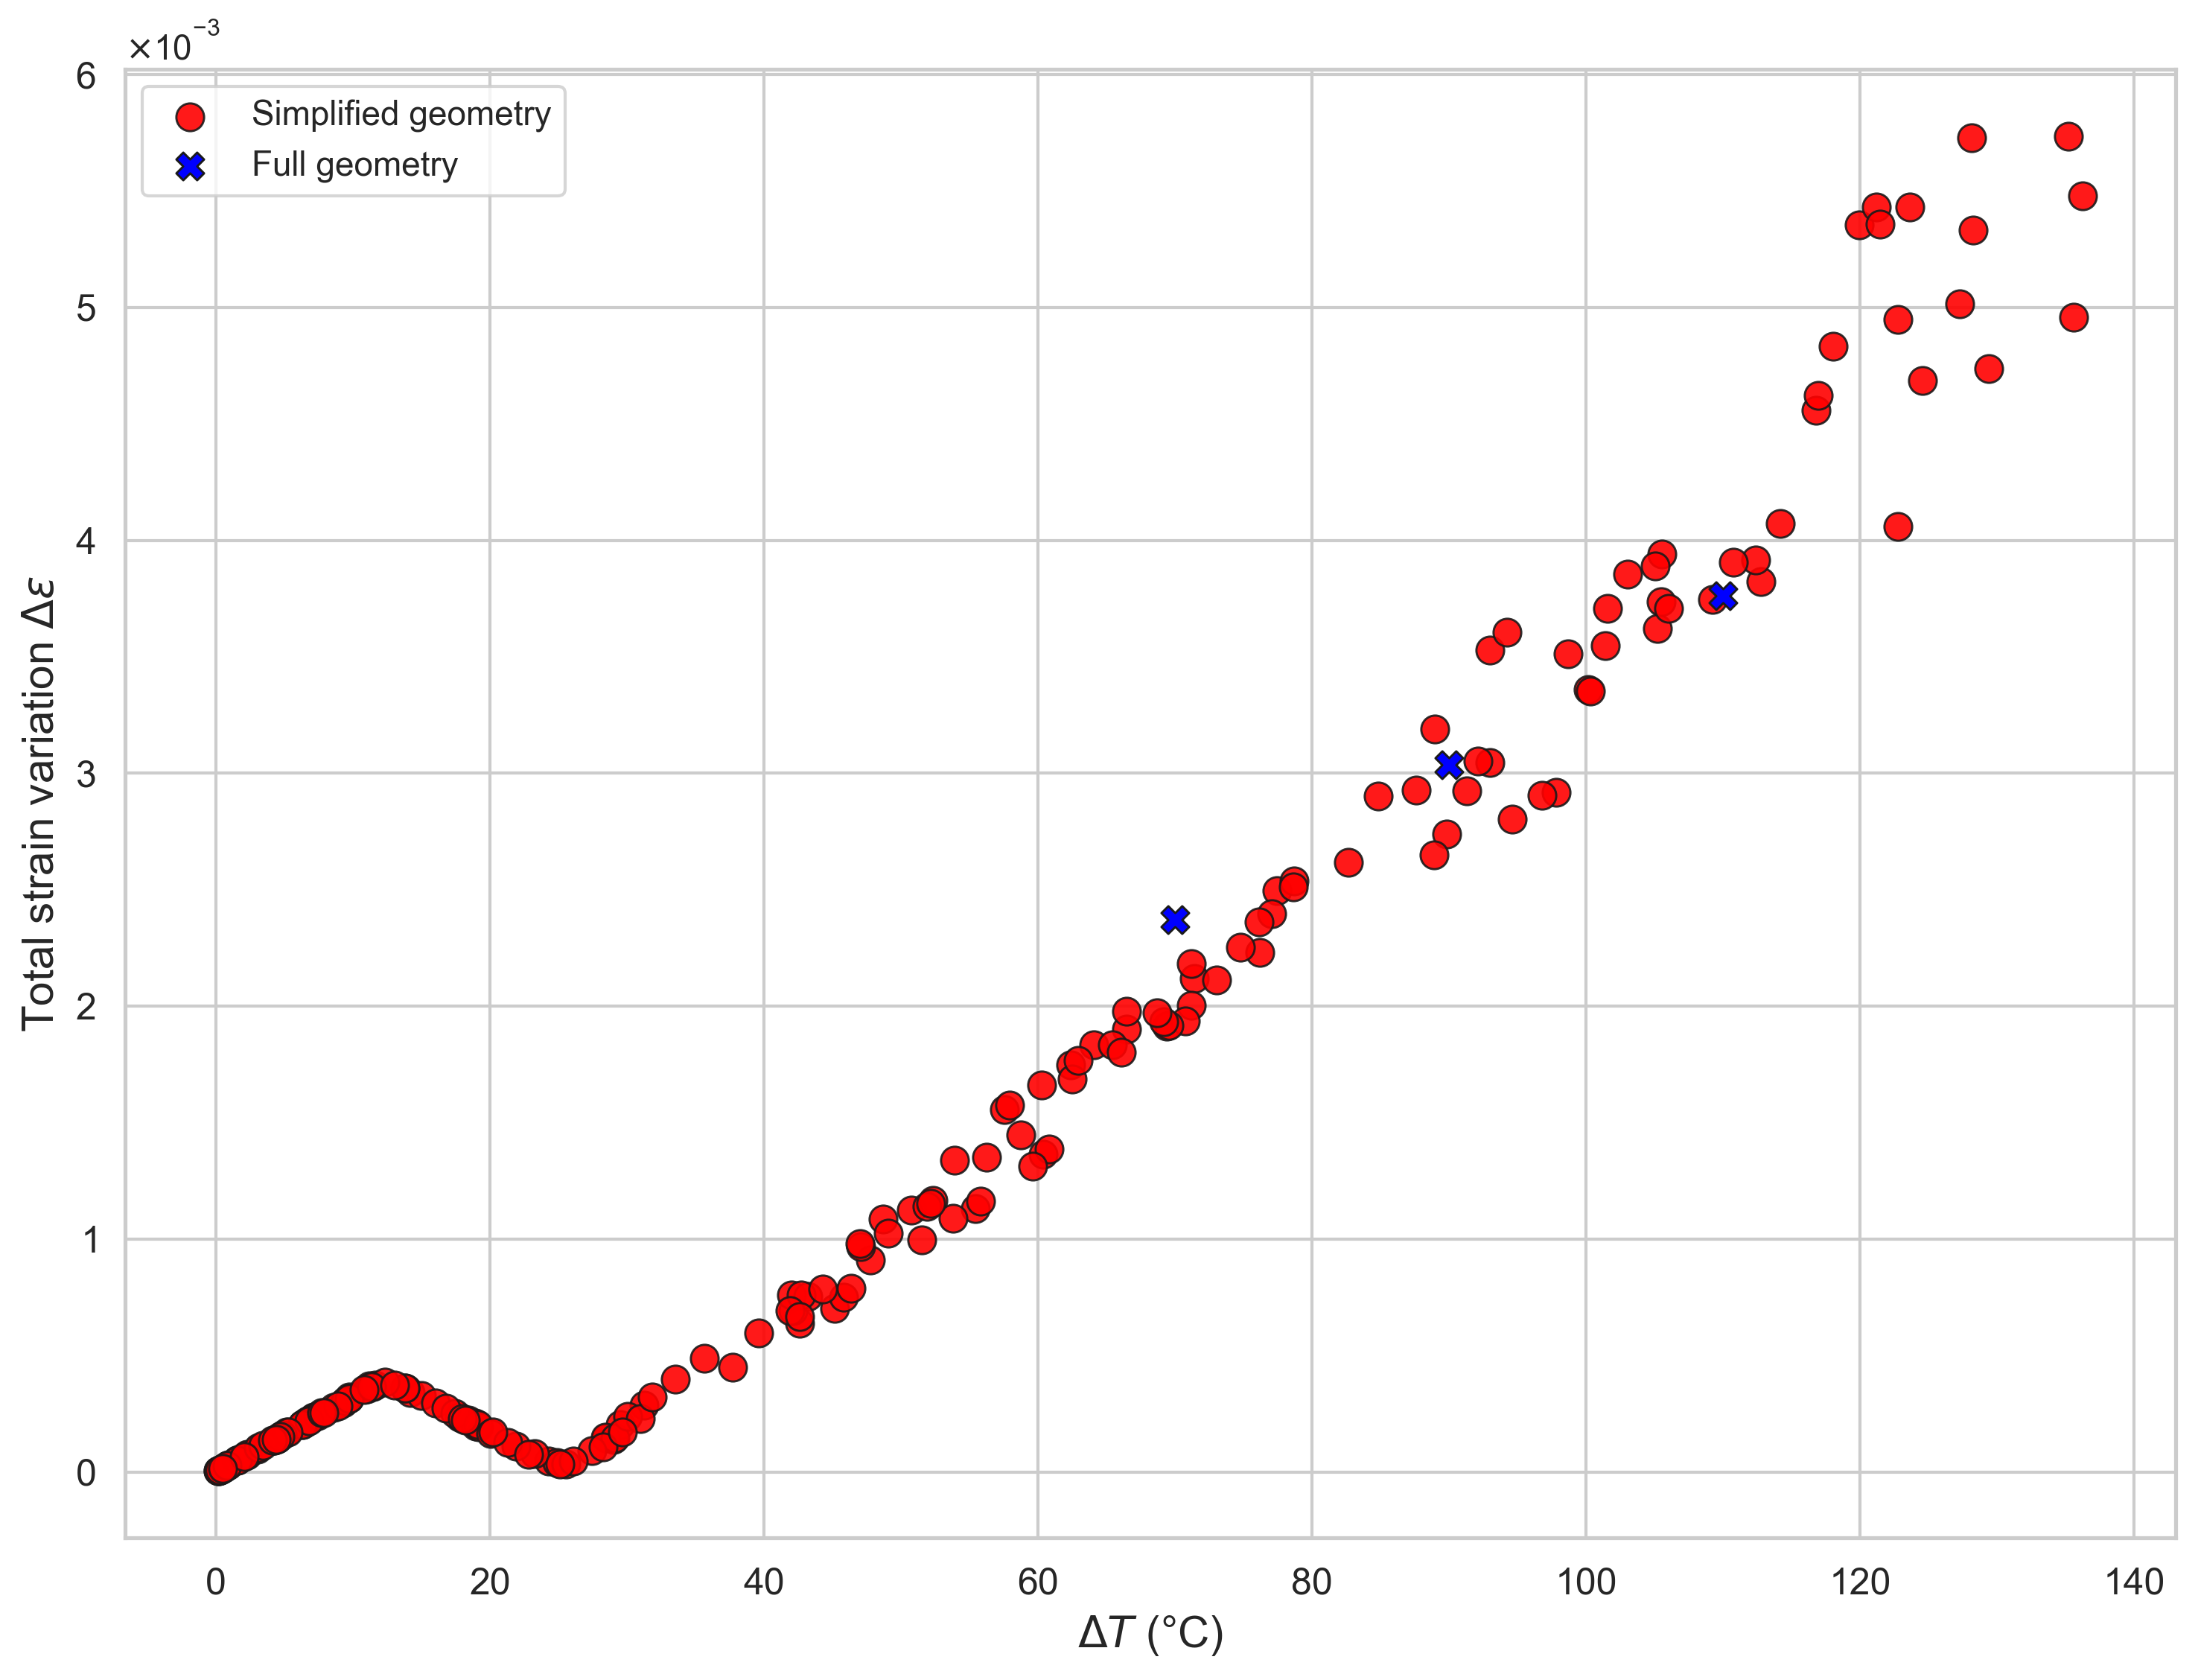

In [25]:
import seaborn as sns


# --- Main Script ---

# 1. Load your data
# In your actual use case, you would load your dataframe here, for example:
# df = pd.read_csv('your_data.csv') 
# For demonstration, we use the sample data generator.


len_thres = 0.361*0.9
# Define column names from your dataframe for easier access

temp_col = "Temperature (°C)"
radius_col = "Contact major radius (mm)"
strain_col = "ETS_C1"



# 3. Plot the results
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
# fig.suptitle('Mean Total Strain Distribution', fontsize=18)

# --- Data Transformation for Plotting ---
# a. X-axis: Temperature difference from the minimum temperature
# temp_min_val = aggregated_df[temp_col].min()
# x_values = aggregated_df[temp_col] - temp_min_val

# # b. Y-axis: Radius converted from mm to micrometers
# y_values = aggregated_df[radius_col] * 1000

# # c. Color: Mean strain values
# color_values = aggregated_df['mean'] #### 

# Scatter plot with transformed data
sc = ax.scatter(
    Eps_Heat["Temperature (°C)"][Eps_Heat["Contact major radius (mm)"]>len_thres]-55,np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]),
    # c=Eps_Heat["Contact major radius (mm)"][Eps_Heat["Contact major radius (mm)"]>0.3],
    # cmap='Reds',
    edgecolors='k', s=80, linewidth=0.7, alpha=0.9,color="red"
)

ax.scatter(Eps_Exp["DeltaT"],Eps_Exp["EpsEl"]+Eps_Exp["EpsPl"],edgecolors='k', s=80, linewidth=0.7,color="blue",marker="X")
ax.legend(["Simplified geometry","Full geometry"])


# Add and configure the color bar
# cbar = fig.colorbar(sc, ax=ax)
# cbar.set_label('Contact major radius (mm)', fontsize=12)

# Set labels for the subplot using LaTeX for formatting
ax.set_xlabel(r'$\Delta T$ (°C)', fontsize=14)
ax.set_ylabel(r'Total strain variation $\Delta \epsilon$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Set axis limits dynamically from the transformed data
x_padding = (np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).max() - np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).min()) * 0.05
y_padding = (np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).max() - np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).min()) * 0.05

# ax.set_xlim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - x_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + x_padding)
# ax.set_ylim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - y_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + y_padding)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))   # force scientific notation if outside [1e-3, 1e3]
ax.yaxis.set_major_formatter(formatter)
# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("mean_strain_plot.png", dpi=300, bbox_inches='tight')
plt.show()


#Give a more meaningful color code (from black to white, no nuances)
#Plot nausicaa values 

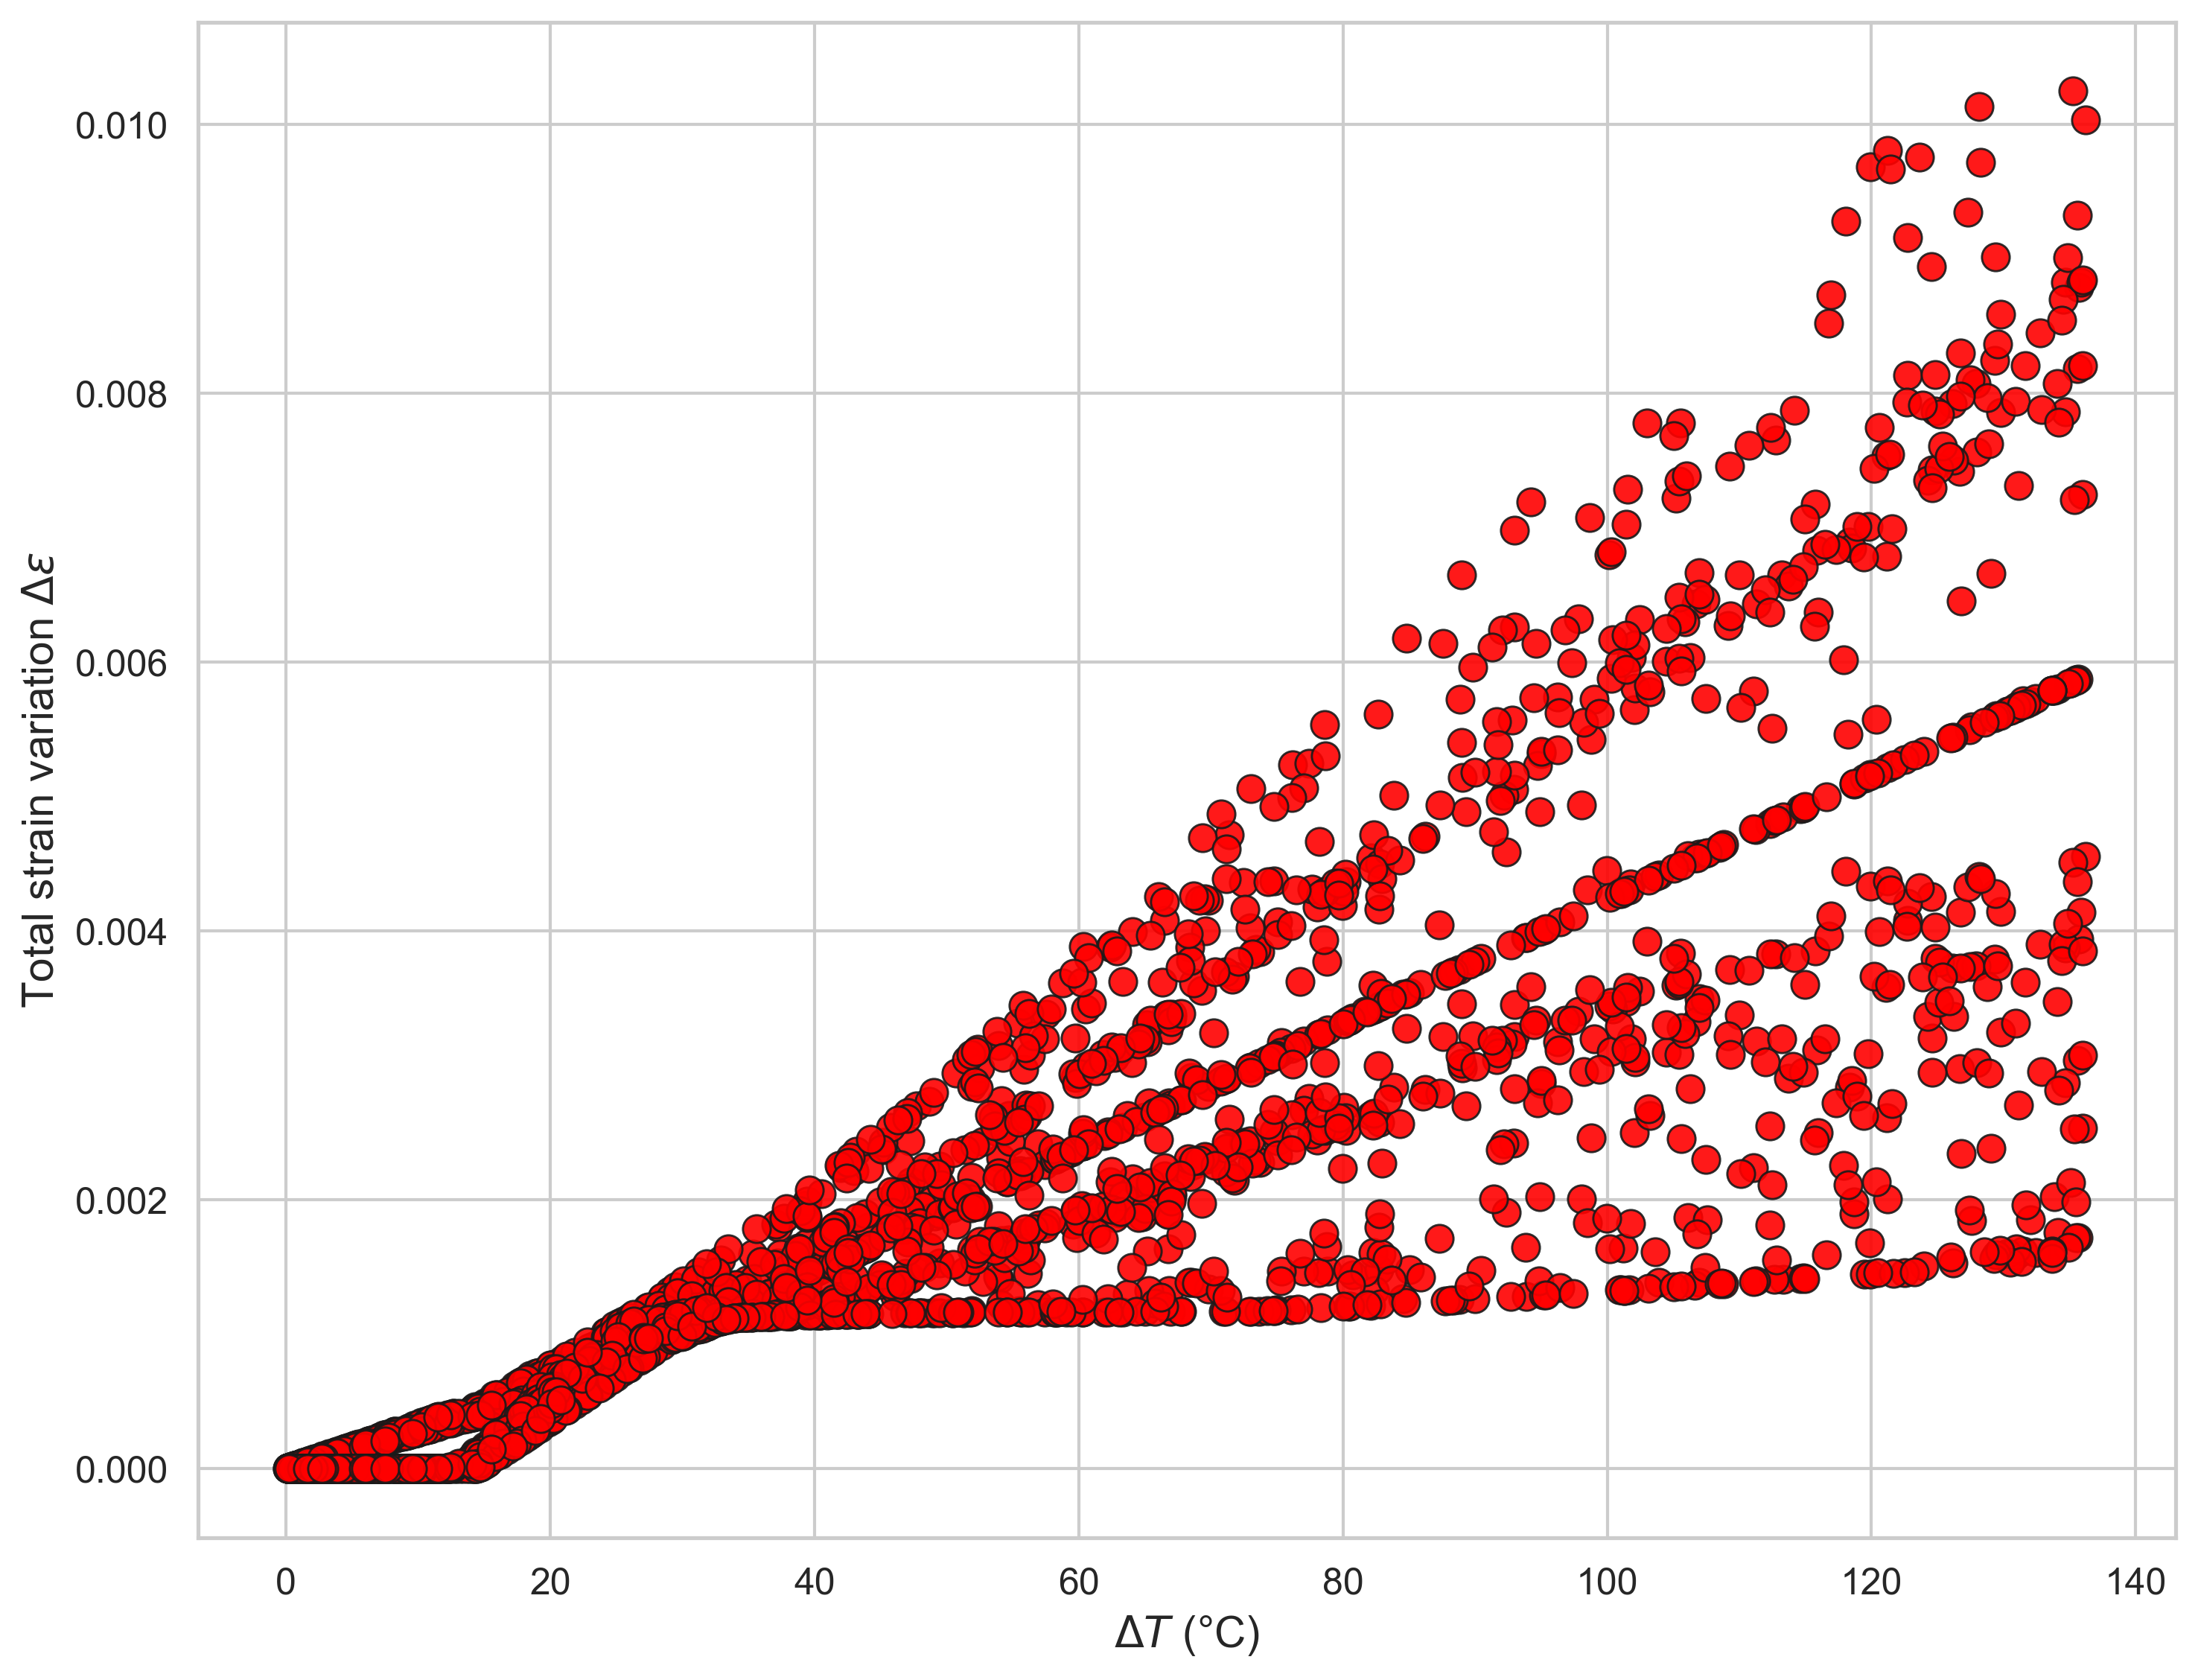

In [26]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
sc = ax.scatter(
    Eps_Heat["Temperature (°C)"]-55,Eps_Heat["ETS_M1"],edgecolors='k', s=80, linewidth=0.7, alpha=0.9,color="red"
)
sc = ax.scatter(
    Eps_Cool["Temperature (°C)"]-55,Eps_Cool["ETS_M2"],edgecolors='k', s=80, linewidth=0.7, alpha=0.9,color="red"
)
ax.set_xlabel(r'$\Delta T$ (°C)', fontsize=14)
ax.set_ylabel(r'Total strain variation $\Delta \epsilon$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# ax.set_xlim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - x_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + x_padding)
# ax.set_ylim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - y_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + y_padding)

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig("mean_strain_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Statistical test 

## Gemini Recommendation 

Kernel-based two-sample testing, Implemented from https://www.kaggle.com/code/onurtunali/maximum-mean-discrepancy

In [13]:
import torch

def rbf_kernel(X, Y, gamma=None):
    """
    Computes the RBF kernel. If gamma is None, it is estimated using the
    median heuristic on the off-diagonal pairwise distances of the pooled data.
    """
    # Create a pooled dataset to estimate gamma from its internal distances
    if gamma is None and X is Y:
        # This is the case where we are estimating gamma from a single dataset
        # (like the pooled data)
        D_sq = torch.cdist(X, X, p=2)**2
        
        # Use only the upper triangular part to get unique off-diagonal distances
        indices = torch.triu_indices(D_sq.shape[0], D_sq.shape[1], offset=1)
        off_diagonal_d_sq = D_sq[indices[0], indices[1]]
        
        median_sq_dist = torch.median(off_diagonal_d_sq)
        gamma = 1.0 / (2 * median_sq_dist)
        
    # Standard kernel calculation
    D_sq = torch.cdist(X, Y, p=2)**2
    K = torch.exp(-gamma * D_sq)
    return K, gamma

def mmd2_unbiased(K_XX, K_YY, K_XY):
    """
    Computes the unbiased MMD squared statistic.

    Args:
        K_XX (torch.Tensor): The kernel matrix for the first sample (n, n).
        K_YY (torch.Tensor): The kernel matrix for the second sample (m, m).
        K_XY (torch.Tensor): The cross-kernel matrix between the samples (n, m).

    Returns:
        float: The unbiased MMD^2 statistic.
    """
    n = K_XX.shape[0]
    m = K_YY.shape[0]

    # The unbiased estimator requires i != j, so we zero out the diagonal
    # and normalize by n(n-1) and m(m-1)
    t1 = K_XX.fill_diagonal_(0).sum() / (n * (n - 1))
    t2 = K_YY.fill_diagonal_(0).sum() / (m * (m - 1))
    t3 = K_XY.sum() * 2 / (n * m)

    return t1 + t2 - t3

def mmd_rbf_permutation_test(X, Y, n_permutations=1000, gamma=None):
    """
    Performs a kernel two-sample test using MMD and a permutation test
    to compute the p-value.

    Args:
        X (torch.Tensor): The first sample (n, d).
        Y (torch.Tensor): The second sample (m, d).
        n_permutations (int, optional): Number of permutations for the test. Defaults to 1000.
        gamma (float, optional): RBF kernel bandwidth. If None, uses median heuristic.

    Returns:
        tuple: A tuple containing:
            - mmd2_original (float): The MMD^2 statistic on the original data.
            - p_value (float): The p-value from the permutation test.
    """
    n, d = X.shape
    m = Y.shape[0]

    # --- Step 1: Compute MMD^2 on the original data ---
    # First, compute the kernel matrix for the pooled data to estimate gamma
    pooled_data = torch.cat([X, Y], dim=0)
    _, gamma_est = rbf_kernel(pooled_data, pooled_data, gamma=gamma)
    
    # Now compute the individual kernel matrices with the estimated gamma
    K_XX, _ = rbf_kernel(X, X, gamma=gamma_est)
    K_YY, _ = rbf_kernel(Y, Y, gamma=gamma_est)
    K_XY, _ = rbf_kernel(X, Y, gamma=gamma_est)

    mmd2_original = mmd2_unbiased(K_XX, K_YY, K_XY)

    # --- Step 2: Perform the permutation test ---
    count = 0
    Z = torch.cat([X, Y], dim=0)

    for _ in range(n_permutations):
        # Shuffle the pooled data
        perm_indices = torch.randperm(n + m)
        Z_perm = Z[perm_indices]

        # Split into new samples
        X_perm = Z_perm[:n]
        Y_perm = Z_perm[n:]

        # Compute MMD^2 for the permuted sample
        K_XX_perm, _ = rbf_kernel(X_perm, X_perm, gamma=gamma_est)
        K_YY_perm, _ = rbf_kernel(Y_perm, Y_perm, gamma=gamma_est)
        K_XY_perm, _ = rbf_kernel(X_perm, Y_perm, gamma=gamma_est)
        
        mmd2_perm = mmd2_unbiased(K_XX_perm, K_YY_perm, K_XY_perm)

        if mmd2_perm >= mmd2_original:
            count += 1

    p_value = count / n_permutations

    return mmd2_original.item(), p_value    

Dummy data

In [14]:
if __name__ == '__main__':
    # Set a seed for reproducibility
    torch.manual_seed(42)

    # --- CASE 1: Samples from the SAME distribution (H0 is true) ---
    # We expect a HIGH p-value, failing to reject the null hypothesis.
    print("--- Case 1: Samples from the same distribution ---")
    X_h0 = torch.randn(100, 2)  # Your dense simulation cloud (n=100, d=2)
    Y_h0 = torch.randn(20, 2)   # Your sparse reference points (m=20, d=2)

    mmd2_h0, p_value_h0 = mmd_rbf_permutation_test(X_h0, Y_h0, n_permutations=500)
    
    print(f"MMD^2 statistic: {mmd2_h0:.4f}")
    print(f"P-value: {p_value_h0:.4f}")
    if p_value_h0 < 0.05:
        print("Result: Reject H0. The distributions are likely different.")
    else:
        print("Result: Fail to reject H0. No significant evidence that distributions are different.")
    print("-" * 50)

    # --- CASE 2: Samples from DIFFERENT distributions (H1 is true) ---
    # We expect a LOW p-value, rejecting the null hypothesis.
    print("--- Case 2: Samples from different distributions ---")
    X_h1 = torch.randn(100, 2)
    # Shift the mean of the second sample to make it different
    Y_h1 = torch.randn(20, 2) + 1.5

    mmd2_h1, p_value_h1 = mmd_rbf_permutation_test(X_h1, Y_h1, n_permutations=500)
    
    print(f"MMD^2 statistic: {mmd2_h1:.4f}")
    print(f"P-value: {p_value_h1:.4f}")
    if p_value_h1 < 0.05:
        print("Result: Reject H0. The distributions are likely different.")
    else:
        print("Result: Fail to reject H0. No significant evidence that distributions are different.")
    print("-" * 50)

--- Case 1: Samples from the same distribution ---
MMD^2 statistic: -0.0142
P-value: 0.7720
Result: Fail to reject H0. No significant evidence that distributions are different.
--------------------------------------------------
--- Case 2: Samples from different distributions ---
MMD^2 statistic: 0.3266
P-value: 0.0000
Result: Reject H0. The distributions are likely different.
--------------------------------------------------


My data

In [15]:
# temps = [70,90,110]
Eps_Heat_modified = Eps_Heat[Eps_Heat["Temperature (°C)"]>95]
Eps_Cool_modified = Eps_Cool[Eps_Cool["Temperature (°C)"]>95]

temps = [110,90,70]
X_delta_eps_sim = pd.DataFrame({
    "Temperature": np.array(Eps_Heat_modified["Temperature (°C)"]) - 55,
    "Eps": np.abs(Eps_Heat_modified["ETS_M1"] - Eps_Cool_modified["ETS_M2"])
}).reset_index(drop=True)

Y_delta_eps_ref = pd.DataFrame({
    "Temperature": Eps_Exp.loc[Eps_Exp["DeltaT"].isin(temps), "DeltaT"].to_numpy(),
    "Eps": (Eps_Exp.loc[Eps_Exp["DeltaT"].isin(temps), "EpsEl"] 
           + Eps_Exp.loc[Eps_Exp["DeltaT"].isin(temps), "EpsPl"]).to_numpy()
}).reset_index(drop=True)

In [16]:
from sklearn.preprocessing import StandardScaler
pooled_data = torch.cat([torch.tensor(X_delta_eps_sim.values), torch.tensor(Y_delta_eps_ref.values)], dim=0).numpy()

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(pooled_data)

# Apply the SAME transformation to both datasets
X_norm = torch.tensor(scaler.transform(torch.tensor(X_delta_eps_sim.values).numpy()), dtype=torch.float32)
Y_norm = torch.tensor(scaler.transform(torch.tensor(Y_delta_eps_ref.values).numpy()), dtype=torch.float32)
print("Normalization complete.\n")

Normalization complete.



In [17]:

mmd2_h0, p_value_h0 = mmd_rbf_permutation_test(X_norm, Y_norm, n_permutations=10000)

print(f"MMD^2 statistic: {mmd2_h0:.4f}")
print(f"P-value: {p_value_h0:.4f}")
if p_value_h0 < 0.05:
    print("Result: Reject H0. The distributions are likely different.")
else:
    print("Result: Fail to reject H0. No significant evidence that distributions are different.")
print("-" * 50)


MMD^2 statistic: 0.0759
P-value: 0.2824
Result: Fail to reject H0. No significant evidence that distributions are different.
--------------------------------------------------


My data with contact length modification

In [18]:
len_thres = 0.361*0.85
Restricted_data = pd.DataFrame({"Temperature":np.array(Eps_Heat_modified["Temperature (°C)"][Eps_Heat_modified["Contact major radius (mm)"]>len_thres]-55),"Eps":np.abs(Eps_Heat_modified[Eps_Heat_modified["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool_modified[Eps_Cool_modified["Contact major radius (mm)"]>len_thres]["ETS_M2"])}).reset_index(drop=True)
pooled_data = torch.cat([torch.tensor(Restricted_data.values), torch.tensor(Y_delta_eps_ref.values)], dim=0).numpy()

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(pooled_data)

# Apply the SAME transformation to both datasets
X_norm = torch.tensor(scaler.transform(torch.tensor(Restricted_data.values).numpy()), dtype=torch.float32)
Y_norm = torch.tensor(scaler.transform(torch.tensor(Y_delta_eps_ref.values).numpy()), dtype=torch.float32)
print("Normalization complete.\n")

mmd2_h0, p_value_h0 = mmd_rbf_permutation_test(X_norm, Y_norm, n_permutations=10000)

print(f"MMD^2 statistic: {mmd2_h0:.4f}")
print(f"P-value: {p_value_h0:.4f}")
if p_value_h0 < 0.05:
    print("Result: Reject H0. The distributions are likely different.")
else:
    print("Result: Fail to reject H0. No significant evidence that distributions are different.")
print("-" * 50)

Normalization complete.

MMD^2 statistic: 0.0566
P-value: 0.3154
Result: Fail to reject H0. No significant evidence that distributions are different.
--------------------------------------------------


In [19]:
len_thres = 0.361*0.9
Restricted_data = pd.DataFrame({"Temperature":np.array(Eps_Heat_modified["Temperature (°C)"][Eps_Heat_modified["Contact major radius (mm)"]>len_thres]-55),"Eps":np.abs(Eps_Heat_modified[Eps_Heat_modified["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool_modified[Eps_Cool_modified["Contact major radius (mm)"]>len_thres]["ETS_M2"])}).reset_index(drop=True)
pooled_data = torch.cat([torch.tensor(Restricted_data.values), torch.tensor(Y_delta_eps_ref.values)], dim=0).numpy()

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(pooled_data)

# Apply the SAME transformation to both datasets
X_norm = torch.tensor(scaler.transform(torch.tensor(Restricted_data.values).numpy()), dtype=torch.float32)
Y_norm = torch.tensor(scaler.transform(torch.tensor(Y_delta_eps_ref.values).numpy()), dtype=torch.float32)
print("Normalization complete.\n")

mmd2_h0, p_value_h0 = mmd_rbf_permutation_test(X_norm, Y_norm, n_permutations=10000)

print(f"MMD^2 statistic: {mmd2_h0:.4f}")
print(f"P-value: {p_value_h0:.4f}")
if p_value_h0 < 0.05:
    print("Result: Reject H0. The distributions are likely different.")
else:
    print("Result: Fail to reject H0. No significant evidence that distributions are different.")
print("-" * 50)

Normalization complete.

MMD^2 statistic: 0.0456
P-value: 0.3364
Result: Fail to reject H0. No significant evidence that distributions are different.
--------------------------------------------------


In [20]:
len_thres = 0.361*0.95
Restricted_data = pd.DataFrame({"Temperature":np.array(Eps_Heat_modified["Temperature (°C)"][Eps_Heat_modified["Contact major radius (mm)"]>len_thres]-55),"Eps":np.abs(Eps_Heat_modified[Eps_Heat_modified["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool_modified[Eps_Cool_modified["Contact major radius (mm)"]>len_thres]["ETS_M2"])}).reset_index(drop=True)
pooled_data = torch.cat([torch.tensor(Restricted_data.values), torch.tensor(Y_delta_eps_ref.values)], dim=0).numpy()

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(pooled_data)

# Apply the SAME transformation to both datasets
X_norm = torch.tensor(scaler.transform(torch.tensor(Restricted_data.values).numpy()), dtype=torch.float32)
Y_norm = torch.tensor(scaler.transform(torch.tensor(Y_delta_eps_ref.values).numpy()), dtype=torch.float32)
print("Normalization complete.\n")

mmd2_h0, p_value_h0 = mmd_rbf_permutation_test(X_norm, Y_norm, n_permutations=10000)

print(f"MMD^2 statistic: {mmd2_h0:.4f}")
print(f"P-value: {p_value_h0:.4f}")
if p_value_h0 < 0.05:
    print("Result: Reject H0. The distributions are likely different.")
else:
    print("Result: Fail to reject H0. No significant evidence that distributions are different.")
print("-" * 50)

Normalization complete.

MMD^2 statistic: 0.0623
P-value: 0.2910
Result: Fail to reject H0. No significant evidence that distributions are different.
--------------------------------------------------


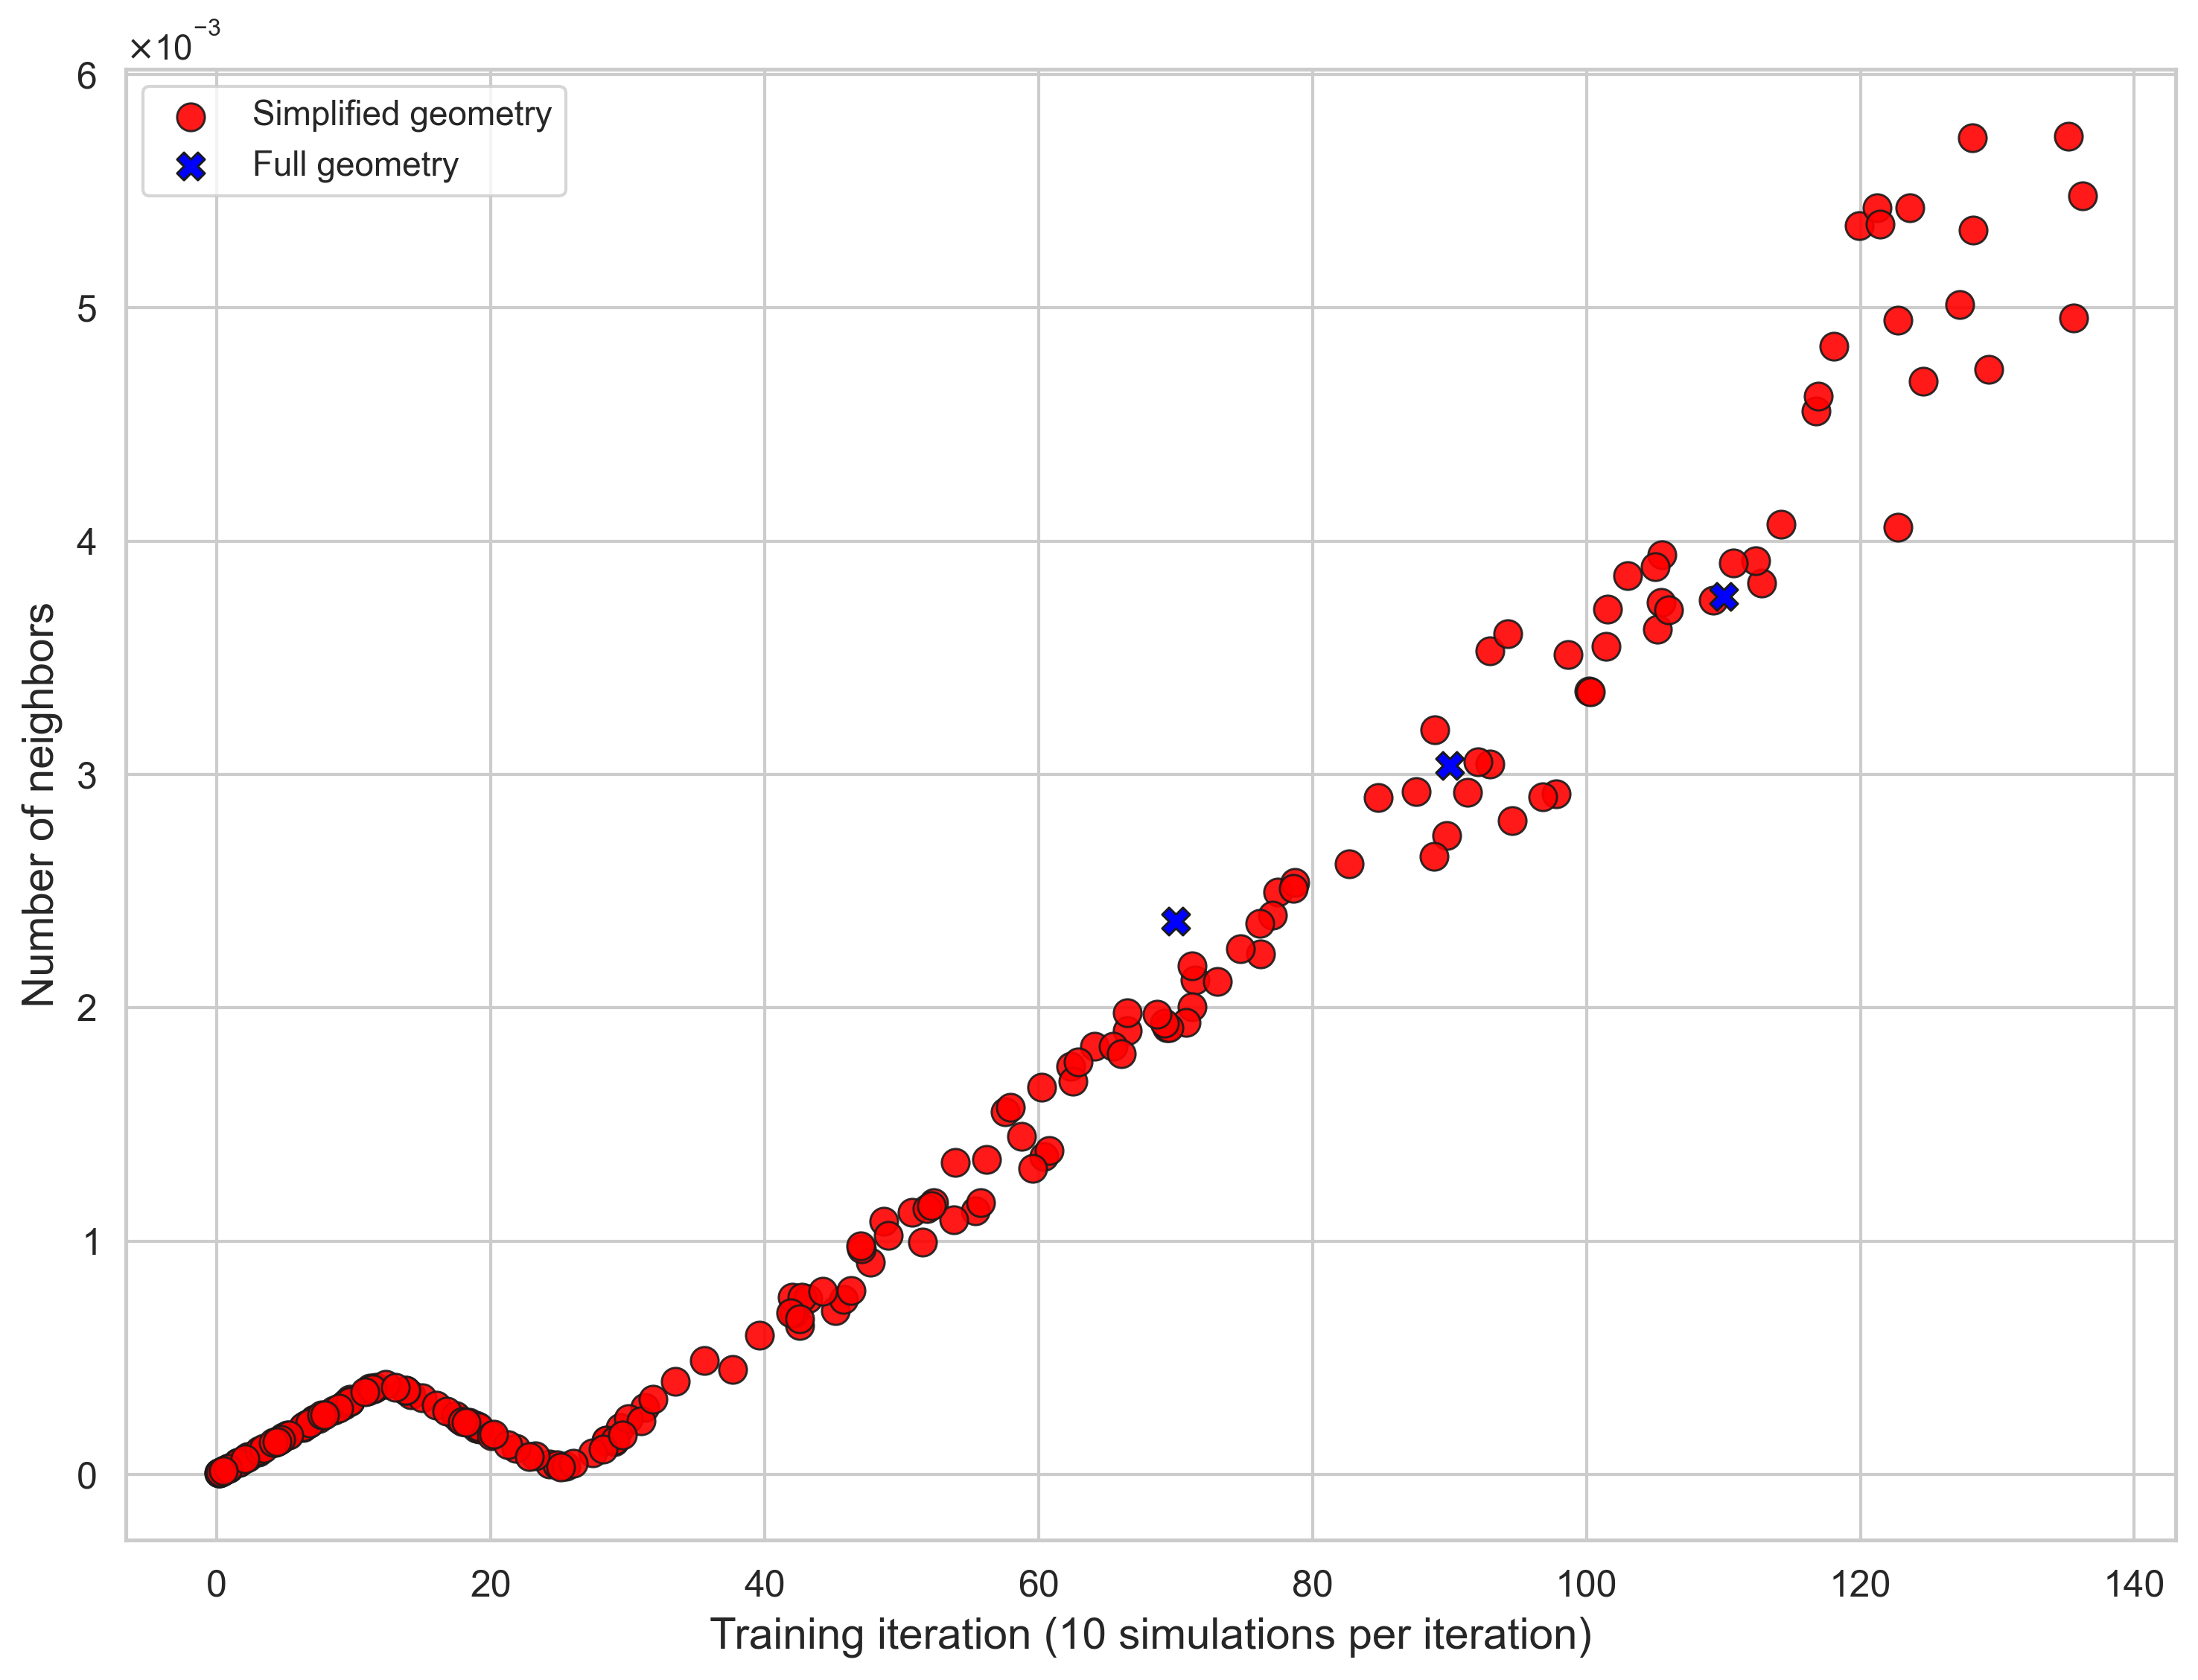

In [30]:
import seaborn as sns


# --- Main Script ---

# 1. Load your data
# In your actual use case, you would load your dataframe here, for example:
# df = pd.read_csv('your_data.csv') 
# For demonstration, we use the sample data generator.


len_thres = 0.361*0.9
# Define column names from your dataframe for easier access

temp_col = "Temperature (°C)"
radius_col = "Contact major radius (mm)"
strain_col = "ETS_C1"



# 3. Plot the results
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
# fig.suptitle('Mean Total Strain Distribution', fontsize=18)

# --- Data Transformation for Plotting ---
# a. X-axis: Temperature difference from the minimum temperature
# temp_min_val = aggregated_df[temp_col].min()
# x_values = aggregated_df[temp_col] - temp_min_val

# # b. Y-axis: Radius converted from mm to micrometers
# y_values = aggregated_df[radius_col] * 1000

# # c. Color: Mean strain values
# color_values = aggregated_df['mean'] #### 

# Scatter plot with transformed data
sc = ax.scatter(
    Eps_Heat["Temperature (°C)"][Eps_Heat["Contact major radius (mm)"]>len_thres]-55,np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]),
    # c=Eps_Heat["Contact major radius (mm)"][Eps_Heat["Contact major radius (mm)"]>0.3],
    # cmap='Reds',
    edgecolors='k', s=80, linewidth=0.7, alpha=0.9,color="red"
)

ax.scatter(Eps_Exp["DeltaT"],Eps_Exp["EpsEl"]+Eps_Exp["EpsPl"],edgecolors='k', s=80, linewidth=0.7,color="blue",marker="X")
ax.legend(["Simplified geometry","Full geometry"])


# Add and configure the color bar
# cbar = fig.colorbar(sc, ax=ax)
# cbar.set_label('Contact major radius (mm)', fontsize=12)

# Set labels for the subplot using LaTeX for formatting
ax.set_xlabel(r'Training iteration (10 simulations per iteration)', fontsize=14)
ax.set_ylabel(r'Number of neighbors', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Set axis limits dynamically from the transformed data
x_padding = (np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).max() - np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).min()) * 0.05
y_padding = (np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).max() - np.abs(Eps_Heat[Eps_Heat["Contact major radius (mm)"]>len_thres]["ETS_M1"]-Eps_Cool[Eps_Cool["Contact major radius (mm)"]>len_thres]["ETS_M2"]).min()) * 0.05

# ax.set_xlim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - x_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + x_padding)
# ax.set_ylim((Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).min() - y_padding, (Eps_Heat["ETS_M1"]-Eps_Cool["ETS_M2"]).max() + y_padding)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))   # force scientific notation if outside [1e-3, 1e3]
ax.yaxis.set_major_formatter(formatter)
# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("mean_strain_plot.png", dpi=300, bbox_inches='tight')
plt.show()


#Give a more meaningful color code (from black to white, no nuances)
#Plot nausicaa values 